# **Imports**

In [46]:
import requests
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

import sqlite3
from io import BytesIO

# **Calling Data**

In [30]:
# Connecting to existing DB
conn = sqlite3.connect("data/waste_facilities.db")  

# Load the full facilities table
df = pd.read_sql("SELECT * FROM facilities", conn)

# **Filtering Data**

In [31]:
# Filtering based on facility type
landfill_type = "Inert or Construction and Demolition Landfills (U.S. EPA/OLEM (2020))"
construction_landfills_df = df[df["Facility Type (Source)"] == landfill_type]

## **Cleaning Data Frame**

In [32]:
# Keeping only essential columns
construction_landfills_df = construction_landfills_df[["Name", "Latitude", "Longitude", "Facility Type (Source)"]]
construction_landfills_df = construction_landfills_df.reset_index(drop=True)

## **Saving to DataBase**

In [33]:
construction_landfills_df.to_sql("construction_landfills", conn, if_exists="replace", index=False)

898

## **Creating Company Column**

In [34]:
construction_landfills_df["Company"] = "Other"

# **Analysing Data**

## **Creating Dictionaries of Subsidiaries for Various Companies**

### **Waste Management Dictionary**

In [35]:
wm_subsidiary_names = [
    "635952 Ontario Inc.",
    "ADS Renewable Energy - Stones Throw, LLC",
    "ADS Renewable Energy - Wolf Creek, LLC",
    "ADS Solid Waste of NJ, Inc.",
    "Advanced Disposal Acquisition Sub, LLC",
    "Advanced Disposal Recycling Services Atlanta, LLC",
    "Advanced Disposal Recycling Services Gulf Coast, LLC",
    "Advanced Disposal Services Alabama Holdings, LLC",
    "Advanced Disposal Services Alabama, LLC",
    "Advanced Disposal Services Biloxi MRF, LLC",
    "Advanced Disposal Services Birmingham, Inc.",
    "Advanced Disposal Services Blackfoot Landfill, Inc.",
    "Advanced Disposal Services Blue Ridge Landfill, Inc.",
    "Advanced Disposal Services Carolinas, LLC",
    "Advanced Disposal Services Cedar Hill Landfill, Inc.",
    "Advanced Disposal Services Central Florida, LLC",
    "Advanced Disposal Services Cobb County Recycling Facility, LLC",
    "Advanced Disposal Services Cranberry Creek Landfill, LLC",
    "Advanced Disposal Services Cypress Acres Landfill, Inc.",
    "Advanced Disposal Services East, Inc.",
    "Advanced Disposal Services Evergreen Landfill, Inc.",
    "Advanced Disposal Services Grand Bahama Limited",
    "Advanced Disposal Services Hancock County, LLC",
    "Advanced Disposal Services Jones Road, LLC",
    "Advanced Disposal Services Lancaster Landfill, LLC",
    "Advanced Disposal Services Magnolia Ridge Landfill, LLC",
    "Advanced Disposal Services Maple Hill Landfill, Inc.",
    "Advanced Disposal Services Midwest, LLC",
    "Advanced Disposal Services Mississippi Holdings, Inc.",
    "Advanced Disposal Services Mississippi, LLC",
    "Advanced Disposal Services Morehead Landfill, Inc.",
    "Advanced Disposal Services National Accounts Holdings, Inc.",
    "Advanced Disposal Services National Accounts, Inc.",
    "Advanced Disposal Services North Alabama Landfill, LLC",
    "Advanced Disposal Services Oak Ridge Landfill, Inc.",
    "Advanced Disposal Services Orchard Hills Landfill, Inc.",
    "Advanced Disposal Services Pasco County, LLC",
    "Advanced Disposal Services Pecan Row Landfill, LLC",
    "Advanced Disposal Services Pontiac Landfill, Inc.",
    "Advanced Disposal Services Renewable Energy, LLC",
    "Advanced Disposal Services Rogers Lake, LLC",
    "Advanced Disposal Services Solid Waste Leasing Corp.",
    "Advanced Disposal Services Solid Waste Midwest, LLC",
    "Advanced Disposal Services Solid Waste Southeast, Inc.",
    "Advanced Disposal Services South, LLC",
    "Advanced Disposal Services Star Ridge Landfill, Inc.",
    "Advanced Disposal Services Sumner Landfill, Inc.",
    "Advanced Disposal Services Taylor County Landfill, LLC",
    "Advanced Disposal Services Tennessee Holdings, Inc.",
    "Advanced Disposal Services Transport, LLC",
    "Advanced Disposal Services Valley Meadows Landfill, LLC",
    "Advanced Disposal Services Valley View Landfill, Inc.",
    "Advanced Disposal Services Vasko Rubbish Removal, Inc.",
    "Advanced Disposal Services Vasko Solid Waste, Inc.",
    "Advanced Disposal Services Wayne County Landfill, Inc.",
    "Advanced Disposal Services, Inc.",
    "Advanced Disposal Subsidiary Holding Company, LLC",
    "Advanced Environmental Technical Services, L.L.C.",
    "Agave Investment Holdings, LLC",
    "Akron Regional Landfill, Inc.",
    "Alabama",
    "Alabama Waste Disposal Solutions, L.L.C.",
    "Alaska",
    "Alliance Sanitary Landfill, Inc.",
    "Alpharetta Transfer Station, LLC",
    "American Landfill, Inc.",
    "Ameriwaste, LLC",
    "Anderson Landfill, Inc.",
    "Antelope Valley Recycling and Disposal Facility, Inc.",
    "Arden Landfill, Inc.",
    "Arizona",
    "Arkansas",
    "Atlantic Waste Disposal, Inc.",
    "Automated Salvage Transport Co., L.L.C.",
    "Avalon South, LLC",
    "Azusa Land Reclamation, Inc.",
    "B&B Landfill, Inc.",
    "Bahamas",
    "Baton Rouge Renewable Energy LLC",
    "Big Dipper Enterprises, Inc.",
    "Blackwood Land Development, LLC",
    "Bluegrass Containment, L.L.C.",
    "Burlington Transfer Station, Inc.",
    "Burney Disposal, Inc.",
    "Burnsville Sanitary Landfill, Inc.",
    "CA Newco, L.L.C.",
    "CGS Leasing, Inc.",
    "CGS Services, Inc.",
    "CR Group, LLC",
    "CWM Chemical Services, L.L.C.",
    "Cal Sierra Disposal",
    "Caldwell Partnership, LLC",
    "California",
    "California Asbestos Monofill, Inc.",
    "Canadian Waste Services Holdings Inc.",
    "Capels Landfill, LLC",
    "Capital Sanitation Company",
    "Capitol Disposal, Inc.",
    "Carolina Grading, Inc.",
    "Caruthers Mill C&D Landfill, LLC",
    "Cedar Ridge Landfill, Inc.",
    "Central Disposal Systems, Inc.",
    "Chadwick Road Landfill, Inc.",
    "Chambers Clearview Environmental Landfill, Inc.",
    "Chambers Development Company, Inc.",
    "Chambers Development of Ohio, Inc.",
    "Chambers of Georgia, Inc.",
    "Chambers of Mississippi, Inc.",
    "Chemical Waste Management of Indiana, L.L.C.",
    "Chemical Waste Management of the Northwest, Inc.",
    "Chemical Waste Management, Inc.",
    "Chesser Island Road Landfill, Inc.",
    "City Environmental Services, Inc. of Waters",
    "Cleburne Landfill Company Corp.",
    "Coast Waste Management, Inc.",
    "Coastal Recyclers Landfill, LLC",
    "Colorado",
    "Community Refuse Service, LLC",
    "Connecticut",
    "Connecticut Valley Sanitary Waste Disposal, Inc.",
    "Conservation Services, Inc.",
    "Continuus Materials Group, LLC",
    "Continuus Materials HoldCo, LLC",
    "Continuus Materials Intellectual Property, LLC",
    "Continuus Materials of Fairless Hills, LLC",
    "Continuus Materials of Iowa, LLC",
    "Continuus Materials of PA, LLC",
    "Continuus Materials, LLC",
    "Coshocton Landfill, Inc.",
    "Cougar Landfill, Inc.",
    "Countryside Landfill, Inc.",
    "Curtis Creek Recovery Systems, Inc.",
    "Cuyahoga Landfill, Inc.",
    "DLD Limited Partnership",
    "Dauphin Meadows, Inc.",
    "Deep Valley Landfill, Inc.",
    "Deer Track Park Landfill, Inc.",
    "Deffenbaugh Disposal, Inc.",
    "Deffenbaugh Group Holdings, Inc.",
    "Deffenbaugh Industries, Inc.",
    "Deffenbaugh Recycling Company, L.L.C.",
    "Deffenbaugh of Arkansas, LLC",
    "Del Almo Landfill, L.L.C.",
    "Delaware",
    "Delaware Basin Landfills, LLC",
    "Delaware Recyclable Products, Inc.",
    "Dickinson Landfill, Inc.",
    "Disposal Service, Incorporated",
    "Dolphin Services & Chemicals, LLC",
    "Dolphin-One, LLC",
    "ELDA Landfill, Inc.",
    "Earthmovers Landfill, L.L.C.",
    "East Liverpool Landfill, Inc.",
    "Eastern One Land Corporation",
    "Eco-Safe Systems, LLC",
    "Eco-Vista, LLC",
    "Elk River Landfill, Inc.",
    "Energy Injection Services of Mississippi, LLC",
    "England",
    "Entity Name",
    "EnviroSolutions Dulles, LLC",
    "EnviroSolutions Holdings, Inc.",
    "EnviroSolutions Real Property Holdings, Inc.",
    "Envirofil of Illinois, Inc.",
    "Evergreen Landfill, Inc.",
    "Evergreen Recycling and Disposal Facility, Inc.",
    "FDS Disposal II, LLC",
    "Farm Properties LLC",
    "Federally Chartered",
    "Firetower Landfill, LLC",
    "Florida",
    "Fred J. Eckert Sanitary Service, Inc.",
    "Furnace Associates, Inc.",
    "G.I. Industries",
    "GA Landfills, Inc.",
    "Gallia Landfill, Inc.",
    "Garnet of Maryland, Inc.",
    "Gateway Transfer Station, LLC",
    "Georgia",
    "Georgia Waste Systems, LLC",
    "Giordano Recycling, L.L.C.",
    "Glades Landfill, LLC",
    "Glen's Sanitary Landfill, Inc.",
    "Grand Central Sanitary Landfill, Inc.",
    "Greenbow, LLC",
    "Greenstar Allentown, LLC",
    "Greenstar Georgia, LLC",
    "Greenstar Managed Services - Connecticut, LLC",
    "Greenstar Managed Services - RLWM, LLC",
    "Greenstar Mid-America, LLC",
    "Greenstar New Jersey, LLC",
    "Greenstar Ohio, LLC",
    "Greenstar Paterson, LLC",
    "Greenstar Pittsburgh, LLC",
    "Greenstar Recycled Holdings, LLC",
    "Greenstar, LLC",
    "Guadalupe Mines Mutual Water Company",
    "Guadalupe Rubbish Disposal Co., Inc.",
    "HWStar Holdings Corp.",
    "Ham Lake Haulers, Inc.",
    "Harmony Landfill, LP",
    "Harris Sanitation, Inc.",
    "Harwood Landfill, Inc.",
    "Hedco Landfill Limited",
    "High Mountain Fuels LLC",
    "Highstar Royal Oaks I, Inc.",
    "Highstar Royal Oaks II, Inc.",
    "Hillsboro Landfill Inc.",
    "Holyoke Sanitary Landfill, Inc.",
    "IN Landfills, L.L.C.",
    "IWStar Waste Holdings Corp.",
    "Idaho",
    "Illinois",
    "India",
    "Indiana",
    "Iowa",
    "Jahner Sanitation, Inc.",
    "Jay County Landfill, L.L.C.",
    "Jones Road Landfill and Recycling, Ltd.",
    "Jurisdiction of Formation / Incorporation",
    "K and W Landfill Inc.",
    "Kansas",
    "Keene Road Landfill, Inc.",
    "Kelly Run Sanitation, Inc.",
    "Kentucky",
    "King George Landfill Properties, LLC",
    "King George Landfill, Inc.",
    "Kirby Canyon Holdings, LLC",
    "L&K Group Holdings LLC",
    "LCS Services, Inc.",
    "Lakeville Recycling, L.P.",
    "Land South Holdings, LLC",
    "Landfill Services of Charleston, Inc.",
    "Landsouth, Inc.",
    "Laurel Highlands Landfill, Inc.",
    "Liberty Landfill, L.L.C.",
    "Liquid Waste Management, Inc.",
    "Longleaf C&D Disposal Facility, Inc.",
    "Looney Bins, Inc.",
    "Mac Land Disposal, Inc. II",
    "Mahoning Landfill, Inc.",
    "Maine",
    "Maryland",
    "Mass Gravel Inc.",
    "Massachusetts",
    "Mc Ginnes Industrial Maintenance Corporation",
    "McDaniel Landfill, Inc.",
    "McGill Landfill, Inc.",
    "Meadowfill Landfill, Inc.",
    "Michigan",
    "Michigan Environs, Inc.",
    "Midwest One Land Corporation",
    "Minnesota",
    "Mississippi",
    "Missouri",
    "Modesto Garbage Co., Inc.",
    "Moor Refuse, Inc.",
    "Moretown Landfill, Inc.",
    "Mostoller Landfill, LLC",
    "Mountain Indemnity Insurance Company",
    "Mountainview Landfill, Inc.",
    "NEWS MA Holdings, Inc.",
    "NEWS Mid-Atlantic Holdings, Inc.",
    "NEWS North East Holdings, Inc.",
    "NEWStar Waste Holdings Corp.",
    "Nassau County Landfill, LLC",
    "Nassau Landfill, L.L.C.",
    "National Guaranty Insurance Company of Vermont",
    "Natura PCR, LLC",
    "Netherlands",
    "Nevada",
    "New England CR L.L.C.",
    "New Jersey",
    "New Mexico",
    "New Milford Landfill, L.L.C.",
    "New Orleans Landfill, L.L.C.",
    "New Providence",
    "New York",
    "North Carolina",
    "North Dakota",
    "North East Waste Services, Inc.",
    "North East Waste Transport, Inc.",
    "North Manatee Recycling and Disposal Facility, L.L.C.",
    "Northwestern Landfill, Inc.",
    "Nova Scotia",
    "Nu-Way Live Oak Reclamation, Inc.",
    "OGH Acquisition Corporation",
    "Oak Grove Disposal Co., Inc.",
    "Oakleaf Global Holdings, Inc.",
    "Oakleaf Waste Management, Inc.",
    "Oakridge Landfill, Inc.",
    "Oakwood Landfill, Inc.",
    "Ohio",
    "Okeechobee Landfill, Inc.",
    "Oklahoma",
    "Old Kings Road Solid Waste, LLC",
    "Old Kings Road, LLC",
    "Ontario",
    "Oregon",
    "Orla Landfill, LLC",
    "Ozark Ridge Landfill, Inc.",
    "P & R Environmental Industries, L.L.C.",
    "PDC Disposal Co., Inc.",
    "Pacific Waste Management L.L.C.",
    "Pappy, Inc.",
    "Parker Sanitation II, Inc.",
    "Pasco Lakes Inc.",
    "Peltz H.C., LLC",
    "Pen-Rob, Inc.",
    "Pennsylvania",
    "People's Landfill, Inc.",
    "Peterson Demolition, Inc.",
    "Petro Waste DeWitt-Hohn Disposal Facility LP",
    "Petro Waste Disposal GP, LLC",
    "Petro Waste Environmental LP",
    "Petro Waste Holdings LP",
    "Petro Waste Howard County Disposal Facility LP",
    "Petro Waste McMullen County Disposal Facility LP",
    "Petro Waste Pecos County Disposal Facility LP",
    "Petro Waste Reagan County Disposal Facility LP",
    "Phoenix Resources, Inc.",
    "Pine Grove Landfill, Inc.",
    "Pine Tree Acres, Inc.",
    "Prime Westport, LLC",
    "Quail Hollow Landfill, Inc.",
    "Questquill Limited",
    "R & B Landfill, Inc.",
    "RAA Colorado, L.L.C.",
    "RAA Trucking, LLC",
    "RCI Hudson, Inc.",
    "RTS Landfill, Inc.",
    "Recycle America Co., L.L.C.",
    "Recycle America Holdings, Inc.",
    "Redwood Landfill, Inc.",
    "Refuse Services, Inc.",
    "Refuse, Inc.",
    "Reliable Landfill, L.L.C.",
    "Remote Landfill Services, Inc.",
    "Reno Disposal Co.",
    "Resco Holdings L.L.C.",
    "Resource Control Composting, Inc.",
    "Resource Control, Inc.",
    "Richland County Landfill, Inc.",
    "Riverbend Landfill Co.",
    "Rust Engineering & Construction Inc.",
    "Rust International Inc.",
    "S & J Landfill Limited Partnership",
    "S & S Grading, Inc.",
    "S&T Materials, LLC",
    "SC Holdings, Inc.",
    "SSI Southland Holdings, Inc.",
    "Sanifill de Mexico (US), Inc.",
    "Sanitation Services Company Limited",
    "Shade Landfill, Inc.",
    "Shawnee Rock Company",
    "Sierra Estrella Landfill, Inc.",
    "Sister's Sanitation Services, LLC",
    "South Carolina",
    "South Dakota",
    "South Hadley Landfill, LLC",
    "South Suburban, LLC",
    "Southern One Land Corporation",
    "Southern Waste Services, L.L.C.",
    "Spruce Ridge, Inc.",
    "St. Johnsbury Transfer Station, Inc.",
    "St. Paul Haulers, LLC",
    "Stony Hollow Landfill, Inc.",
    "Suburban Landfill, Inc.",
    "Summit Disposal Inc.",
    "Summit, Inc.",
    "Superior Waste Services of New York City, Inc.",
    "T2L Trucking, LLC",
    "TN'T Sands, Inc.",
    "TW PWE GP, LLC",
    "TX Newco, L.L.C.",
    "Tennessee",
    "Texarkana Landfill, L.L.C.",
    "Texas",
    "Texas Pack Rat - Austin #1 LLC",
    "Texas Pack Rat - Dallas #1 LLC",
    "Texas Pack Rat - Houston #1 LLC",
    "Texas Pack Rat - Houston #2 LLC",
    "Texas Pack Rat - Houston #3 LLC",
    "Texas Pack Rat - San Antonio #1 LLC",
    "Texas Pack Rat Service Company LLC",
    "The Peltz Group, LLC",
    "The Waste Management Charitable Foundation",
    "The Woodlands of Van Buren, Inc.",
    "Trail Ridge Landfill, Inc.",
    "Transamerican Waste Central Landfill, Inc.",
    "Trash Hunters, Inc.",
    "Twin Bridges Golf Club, L.P.",
    "USA South Hills Landfill, Inc.",
    "USA Valley Facility, Inc.",
    "USA Waste Geneva Landfill, Inc.",
    "USA Waste Landfill Operations and Transfer, Inc.",
    "USA Waste Services of NYC, Inc.",
    "USA Waste of California, Inc.",
    "USA Waste of Texas Landfills, Inc.",
    "USA Waste of Virginia Landfills, Inc.",
    "USA Waste-Management Resources, LLC",
    "USA-Crinc, L.L.C.",
    "USB LIHTC Fund 2010-1, LLC",
    "USB LIHTC-NMTC FUND 2018-2, LLC",
    "USB LIHTC-NMTC FUND 2019-1, LLC",
    "USB LIHTC-NMTC Fund 2022-1, LLC",
    "UWS Barre, Inc.",
    "United Waste Systems Leasing, Inc.",
    "Urban Sanitation Limited",
    "Utah",
    "Valley Garbage and Rubbish Company, Inc.",
    "Vermont",
    "Vermont Hauling, Inc.",
    "Vern's Refuse Service, Inc.",
    "Vickery Environmental, Inc.",
    "Virginia",
    "Vista Landfill, LLC",
    "Voyageur Disposal Processing, Inc.",
    "WBLF Acquisition Company, LLC",
    "WM Avon, Inc.",
    "WM Bagco, LLC",
    "WM Billerica, Inc.",
    "WM Biloxi Hauling, LLC",
    "WM Biloxi Transfer Station, LLC",
    "WM Boston CORE, Inc.",
    "WM CCP Solutions, LLC",
    "WM Compactor Solutions, Inc.",
    "WM Conversion Fund, LLC",
    "WM Corporate Services, Inc.",
    "WM Curbside, LLC",
    "WM DC 1, LLC",
    "WM Dutch Holdings B.V.",
    "WM Emergency Employee Support Fund, Inc.",
    "WM Energy Resources, Inc.",
    "WM Energy Services Holdings, LLC",
    "WM Energy Services of Ohio, LLC",
    "WM Energy Solutions, Inc.",
    "WM European Holdings, Inc.",
    "WM GTL JV Holdings, LLC",
    "WM GTL, Inc.",
    "WM GTL, LLC",
    "WM Green Squad, LLC",
    "WM GreenOps, LLC",
    "WM Healthcare Solutions, Inc.",
    "WM Illinois Renewable Energy, L.L.C.",
    "WM Intellectual Property Holdings, L.L.C.",
    "WM International Holdings, Inc.",
    "WM KS Energy Resources, LLC",
    "WM LNG, Inc.",
    "WM LampTracker, Inc.",
    "WM Landfills of Ohio, Inc.",
    "WM Landfills of Tennessee, Inc.",
    "WM Leasing Services of Texas, LLC",
    "WM Leasing of Arizona, L.L.C.",
    "WM Leasing of Texas, L.P.",
    "WM Logistics, LLC",
    "WM Middle Tennessee Environmental Center, L.L.C.",
    "WM Mobile Bay Environmental Center, Inc.",
    "WM ND Energy Resources II, LLC",
    "WM ND Energy Resources, LLC",
    "WM National Field Services, LLC",
    "WM Nevada Renewable Energy, L.L.C.",
    "WM North Broward, Inc.",
    "WM Organic Growth, Inc.",
    "WM Organics, LLC",
    "WM PA Holdings, LLC",
    "WM PRG, L.L.C.",
    "WM Pack-Rat of California, LLC",
    "WM Pack-Rat of Illinois, LLC",
    "WM Pack-Rat of Kentucky, LLC",
    "WM Pack-Rat of Maryland, LLC",
    "WM Pack-Rat of Massachusetts, LLC",
    "WM Pack-Rat of Michigan, LLC",
    "WM Pack-Rat of Nevada, LLC",
    "WM Pack-Rat of Ohio, LLC",
    "WM Pack-Rat of Rhode Island, LLC",
    "WM Pack-Rat, LLC",
    "WM Partnership Holdings, Inc.",
    "WM Phoenix Energy Resources, LLC",
    "WM Propane, LLC",
    "WM Quebec Inc.",
    "WM RA Canada Inc.",
    "WM Recycle America, L.L.C.",
    "WM Recycle Europe, L.L.C.",
    "WM Recycling Latin America, LLC",
    "WM Refined Coal, LLC",
    "WM Renewable Energy, L.L.C.",
    "WM Resource Recovery & Recycling Center, Inc.",
    "WM Resources, Inc.",
    "WM Safety Services, L.L.C.",
    "WM Security Services, Inc.",
    "WM Storage II, Inc.",
    "WM Storage, Inc.",
    "WM TX Energy Resources II, LLC",
    "WM TX Energy Resources, LLC",
    "WM Texas Pack Rat, LLC",
    "WM Transport of Indiana, LLC",
    "WM Trash Monitor Plus, L.L.C.",
    "WM Universal Solutions Private Limited",
    "WM WY Energy Resources II, LLC",
    "WM WY Energy Resources III, LLC",
    "WM WY Energy Resources, LLC",
    "WM Waste, Inc.",
    "WM of North Dakota Energy Disposal Solutions, LLC",
    "WMI Mexico Holdings, Inc.",
    "WMNA Container Recycling, L.L.C.",
    "WMRE of Kentucky, LLC",
    "WMRE of Michigan, LLC",
    "WMRE of Ohio, LLC",
    "WMRE of Ohio-American, LLC",
    "WMSALSA, Inc.",
    "WSI Medical Waste Systems, Inc.",
    "WSI of New York, Inc.",
    "WTI Air Pollution Control Inc.",
    "WTI Rust Holdings Inc.",
    "Waitsfield Transfer Station, Inc.",
    "Warner Company",
    "Washington",
    "Waste Away Group, Inc.",
    "Waste Management Arizona Landfills, Inc.",
    "Waste Management Buckeye, L.L.C.",
    "Waste Management Collection and Recycling, Inc.",
    "Waste Management Disposal Services of Colorado, Inc.",
    "Waste Management Disposal Services of Maine, Inc.",
    "Waste Management Disposal Services of Maryland, Inc.",
    "Waste Management Disposal Services of Massachusetts, Inc.",
    "Waste Management Disposal Services of Oregon, Inc.",
    "Waste Management Disposal Services of Pennsylvania, Inc.",
    "Waste Management Disposal Services of Virginia, Inc.",
    "Waste Management Energy Services of Texas, LLC",
    "Waste Management Holdings, Inc.",
    "Waste Management Inc. of Florida",
    "Waste Management Indycoke, L.L.C.",
    "Waste Management International, Inc.",
    "Waste Management Milam Property, LLC",
    "Waste Management National Services, Inc.",
    "Waste Management National Transportation Services, Inc.",
    "Waste Management Partners, Inc.",
    "Waste Management Recycling and Disposal Services of California, Inc.",
    "Waste Management Recycling of New Jersey, L.L.C.",
    "Waste Management Service Center, Inc.",
    "Waste Management of Alameda County, Inc.",
    "Waste Management of Alaska, Inc.",
    "Waste Management of Arizona, Inc.",
    "Waste Management of Arkansas, Inc.",
    "Waste Management of California, Inc.",
    "Waste Management of Canada Corporation",
    "Waste Management of Carolinas, Inc.",
    "Waste Management of Colorado, Inc.",
    "Waste Management of Connecticut, Inc.",
    "Waste Management of Delaware, Inc.",
    "Waste Management of Fairless, L.L.C.",
    "Waste Management of Five Oaks Recycling and Disposal Facility, Inc.",
    "Waste Management of Georgia, Inc.",
    "Waste Management of Hawaii, Inc.",
    "Waste Management of Idaho, Inc.",
    "Waste Management of Illinois, Inc.",
    "Waste Management of Indiana Holdings One, Inc.",
    "Waste Management of Indiana Holdings Two, Inc.",
    "Waste Management of Indiana, L.L.C.",
    "Waste Management of Iowa, Inc.",
    "Waste Management of Kansas, Inc.",
    "Waste Management of Kentucky Holdings, Inc.",
    "Waste Management of Kentucky, L.L.C.",
    "Waste Management of Leon County, Inc.",
    "Waste Management of Londonderry, Inc.",
    "Waste Management of Louisiana Holdings One, Inc.",
    "Waste Management of Louisiana, L.L.C.",
    "Waste Management of Maine, Inc.",
    "Waste Management of Maryland, Inc.",
    "Waste Management of Massachusetts, Inc.",
    "Waste Management of Metro Atlanta, Inc.",
    "Waste Management of Michigan, Inc.",
    "Waste Management of Minnesota, Inc.",
    "Waste Management of Mississippi, Inc.",
    "Waste Management of Missouri, Inc.",
    "Waste Management of Montana, Inc.",
    "Waste Management of Nebraska, Inc.",
    "Waste Management of Nevada, Inc.",
    "Waste Management of New Hampshire, Inc.",
    "Waste Management of New Jersey, Inc.",
    "Waste Management of New Mexico, Inc.",
    "Waste Management of New York, L.L.C.",
    "Waste Management of North Dakota, Inc.",
    "Waste Management of Ohio, Inc.",
    "Waste Management of Oklahoma, Inc.",
    "Waste Management of Oregon, Inc.",
    "Waste Management of Pennsylvania Gas Recovery, L.L.C.",
    "Waste Management of Pennsylvania, Inc.",
    "Waste Management of Rhode Island, Inc.",
    "Waste Management of South Carolina, Inc.",
    "Waste Management of South Dakota, Inc.",
    "Waste Management of Texas Holdings, Inc.",
    "Waste Management of Texas, Inc.",
    "Waste Management of Tunica Landfill, Inc.",
    "Waste Management of Utah, Inc.",
    "Waste Management of Virginia, Inc.",
    "Waste Management of Washington, Inc.",
    "Waste Management of West Virginia, Inc.",
    "Waste Management of Wisconsin, Inc.",
    "Waste Management of Wyoming, Inc.",
    "Waste Management, Inc. of Tennessee",
    "Waste Management-Green Ridge RDF, LLC",
    "West Virginia",
    "Western One Land Corporation",
    "Western Waste Industries",
    "Western Waste of Texas, L.L.C.",
    "Westminster Land Acquisition, LLC",
    "Wheelabrator Technologies International Inc.",
    "White Lake Landfill, Inc.",
    "Willow Oak Landfill, LLC",
    "Wisconsin",
    "Wolf Creek Landfill, LLC",
    "eCycling Services, L.L.C."
]

wm_subsidiary_prefixes = set(
    " ".join(name.lower().split()[:2]) for name in wm_subsidiary_names
)


### **Republic Waste Dictionary**

In [36]:
republic_subsidiary_names = [
    "AAA Transfer",
    "Ace Disposal",
    "Action Sanitation",
    "Adams Sanitation",
    "Advanced Disposal",
    "Allied Waste",
    "Browning-Ferris",
    "Chambers Development",
    "Chambers Waste",
    "Envirocycle",
    "Hudson Valley",
    "Labrie Environmental",
    "Metro Disposal",
    "Nevada Waste",
    "Pacific Disposal",
    "Phoenix Sanitation",
    "Republic Silver State",
    "Seaside Disposal",
    "Sunshine Disposal",
    "Thunder Basin",
    "USA Waste",
    "Western Waste",
    "WMI Medical",
    "A&D Disposal",
    "AAA Sanitation",
    "Aarrow Disposal",
    "Ace Sanitation Service",
    "Adams Sanitation Service",
    "Advance Disposal Service",
    "All Waste",
    "Allied Sanitation",
    "Allied Systems",
    "Allied Waste Industries",
    "Allied Waste North America",
    "American Disposal",
    "American Sanitation",
    "Arwood Waste",
    "ASW Disposal",
    "Atlas Disposal",
    "Bayside Disposal",
    "BFI Waste Systems",
    "Big Truck Disposal",
    "Big Valley Sanitation",
    "Blue Ridge Disposal",
    "Bluegrass Waste",
    "Boone County Disposal",
    "Browning Ferris Industries",
    "Burton Sanitation",
    "C&C Disposal",
    "Cal-Waste Recovery Systems",
    "Capital Waste Services",
    "Cascadia Waste Management",
    "Cedar Hills Disposal",
    "Central Waste",
    "Champion Waste",
    "City Disposal",
    "Clean Earth Systems",
    "Coastal Waste Services",
    "Columbia Waste Systems",
    "Community Sanitation",
    "County Waste",
    "D&D Disposal",
    "Daniels Disposal Service",
    "Davis Sanitation",
    "Delaware Waste Services",
    "Delta Disposal",
    "Desert Disposal",
    "Diamond Disposal",
    "Dixie Waste Services",
    "Eagle Waste",
    "East Coast Disposal",
    "Eastern Sanitation",
    "Eco Waste Disposal",
    "Enviro Solutions",
    "Environmental Sanitation",
    "Evergreen Disposal Services",
    "EZ Waste",
    "Fairfield County Waste",
    "Family Sanitation",
    "Federal Disposal",
    "First Class Disposal",
    "Florida Recycling",
    "Foothill Disposal",
    "Franklin Sanitation",
    "Freedom Waste Services",
    "Frontier Disposal",
    "Gaines Sanitation",
    "Garbage Gone",
    "Gibson Disposal",
    "Gold Country Disposal",
    "Golden State Waste",
    "Green Waste Recovery",
    "Greenland Sanitation",
    "Hamilton Sanitation",
    "Heritage Disposal",
    "High Desert Waste",
    "Highland Waste Services",
    "Hill Country Waste",
    "Horizon Waste Services",
    "Illinois Sanitation",
    "Indianapolis Disposal",
    "Indy Disposal Services",
    "Industrial Waste Services",
    "Intermountain Waste",
    "Iowa Waste Systems",
    "Ironwood Disposal",
    "J&M Sanitation",
    "James Disposal",
    "Jefferson County Disposal",
    "Jet Waste",
    "Johnson Disposal",
    "Kane County Waste",
    "King Sanitation",
    "Kings River Disposal",
    "L&L Disposal",
    "La Salle Waste Services",
    "Lake County Waste",
    "Lake Michigan Disposal",
    "Landmark Disposal",
    "Legacy Disposal",
    "Liberty Waste Services",
    "Linn County Waste",
    "Logan Sanitation",
    "Lowcountry Waste Services",
    "Lynchburg Sanitation",
    "M&M Disposal",
    "Madera Disposal Systems",
    "Madison County Disposal",
    "Magnolia Disposal",
    "Main Street Sanitation",
    "Marble Valley Waste",
    "Marion County Disposal",
    "McKenzie Waste Services",
    "Metroplex Disposal",
    "Mid-America Sanitation",
    "Midwest Waste",
    "Millennium Waste",
    "Mission Disposal",
    "Mobile Sanitation",
    "Mountain Disposal",
    "Murray Sanitation",
    "Nashville Sanitation",
    "National Disposal Systems",
    "Nevada County Sanitation",
    "New River Waste",
    "New York Sanitation Services",
    "North County Disposal",
    "North Star Waste",
    "Northwest Disposal",
    "NOVA Disposal",
    "Oak Ridge Sanitation",
    "Ocean State Sanitation",
    "Odyssey Waste",
    "Olympic Disposal",
    "Orange County Disposal",
    "Oregon Sanitation Services",
    "Pacific Rim Waste",
    "Palmetto Waste",
    "Panhandle Waste Services",
    "Pioneer Sanitation",
    "Placer County Disposal",
    "Port City Sanitation",
    "Prairie Waste",
    "Preferred Disposal",
    "Premier Waste Solutions",
    "Prestige Sanitation",
    "Prime Disposal",
    "Progressive Waste",
    "Prospect Sanitation",
    "Public Sanitation Services",
    "Quality Waste Services",
    "R&R Disposal",
    "R3 Sanitation",
    "Raleigh Sanitation",
    "Rapid Disposal",
    "Razorback Waste",
    "Red Rock Disposal",
    "Regal Waste",
    "Reliable Sanitation",
    "Reno Sanitation",
    "Republic Waste Services",
    "ResCom Disposal",
    "Richmond County Waste",
    "Ridgeland Sanitation",
    "Rio Grande Disposal",
    "River City Waste Services",
    "Riverside Disposal",
    "Rocky Mountain Disposal",
    "Rural Waste Systems",
    "S&S Disposal",
    "Sacramento Disposal Services",
    "Safe Waste Solutions",
    "Sage Waste",
    "San Diego Disposal",
    "Sandhills Sanitation",
    "Santa Fe Waste Services",
    "Sapphire Sanitation",
    "Savannah Sanitation",
    "Scenic City Waste",
    "Seaboard Disposal",
    "Seminole Sanitation",
    "Seneca Disposal",
    "Shamrock Environmental Landfill",
    "Sierra Waste Services",
    "Silver State Disposal",
    "Smoky Mountain Disposal",
    "Solid Waste Systems",
    "South Coast Sanitation",
    "South County Waste",
    "South Shore Disposal",
    "Southern Nevada Waste",
    "Southern Sanitation",
    "Southland Disposal Services",
    "Southwest Waste",
    "Springfield Disposal",
    "St. Louis Disposal",
    "Star Waste Systems",
    "Statewide Disposal",
    "Sterling Waste",
    "Summit Sanitation",
    "Sun City Disposal",
    "Sunset Sanitation",
    "Superior Waste Services",
    "Sure Waste",
    "Tennessee Valley Waste",
    "Texoma Waste Services",
    "Texas Disposal Solutions",
    "The Trash Company",
    "Three Rivers Waste",
    "Thunder Mountain Disposal",
    "Tidewater Sanitation",
    "Top Notch Sanitation",
    "Total Waste Solutions",
    "TransAmerican Waste",
    "Tri-County Disposal",
    "Tri-State Sanitation",
    "Triple T Waste",
    "Troy Sanitation Services",
    "Twin City Disposal",
    "Uinta Waste",
    "Union County Disposal",
    "United Disposal",
    "Universal Sanitation",
    "Unlimited Disposal",
    "Urban Sanitation",
    "Valley Waste Services",
    "Vanguard Disposal",
    "Vegas Valley Waste",
    "Village Sanitation",
    "Vintage Waste Services",
    "Vista Sanitation",
    "Volunteer Disposal",
    "Waste Connections",
    "Waste Control",
    "Waste Industries",
    "Waste Recovery Systems",
    "Waste Solutions Group",
    "Waste Systems Inc.",
    "Waste Technologies",
    "Waste Tech Services",
    "Waterside Sanitation",
    "Western Recycling",
    "White Mountain Waste",
    "Wichita Sanitation",
    "Wildcat Disposal",
    "Willow Creek Waste",
    "Windsor Sanitation",
    "Wolfpack Disposal",
    "Wolfe Sanitation",
    "Yosemite Disposal",
    "Young's Disposal",
]

rs_subsidiary_prefixes = set(
    " ".join(name.lower().split()[:2]) for name in republic_subsidiary_names
)

### **Waste Connection Dictionary**

In [37]:
wcn_subsidiary_names = [
    '10100 Holdings, LLC', 
    '115 W Main Holdings, LLC', 
    '1280 N. Main St., LLC',
    '1895548 Ontario Limited',
    '19th & Lower Buckeye, LLC',
    '2201898 Alberta ULC', 
    '2361975 Alberta Ltd.',
    '2362047 Alberta ULC',
    '2362085 Alberta ULC',
    '2585030 Alberta Ltd.',
    '2585319 Alberta Ltd.',
    '2596557 Ontario Ltd.',
    '2980 Dede Road, LLC',
    '371 Brian Holdings, LLC',
    '9164 9608 Quebec Inc.',
    '9199 5209 Quebec Inc.',
    'A.C.M.S., Inc.',
    'Ace Solid Waste, Inc.',
    'Advanced Systems Portable Restrooms, Inc.',
    'Airborne Disposal, LLC',
    'American Disposal Services of Georgia, Inc.',
    'American Waste Control, Inc.',
    'American Waste, Inc.',
    'Bin There Disposal Services, Ltd.',
    'Bonnie Waste and Recycling Inc.',
    'County Waste of Virginia, LLC',
    'Dillon Waste Disposal',
    'E.L. Harvey & Sons, Inc.',
    'Gulliford Septic & Sewer, Inc.',
    'Integrity Waste Services, Inc.',
    'Jim Disposal Service, Inc.',
    'Mid-Michigan Waste Authority',
    'Northern Waste Services, LLC',
    'PDC Services, Inc.',
    'Progressive Waste Solutions Ltd.',
    'Rizzo Environmental Services, Inc.',
    'Rock River Environmental Services, Inc.', 
    'Rural Waste Management, Inc.',
    'Tidewater Fibre Corporation',
    'Waste Connections of Canada Inc.',
    'Waste Connections of Florida, Inc.', 
    'Waste Connections of Nebraska, Inc.', 
    'Waste Connections of Tennessee, Inc.', 
    'Waste Connections US, Inc.', 
    'Waste Systems Inc.', 
    'WCA Waste Corporation'
    ]

wc_subsidiary_prefixes = set(
    " ".join(name.lower().split()[:2]) for name in wcn_subsidiary_names
)

### **Cassella Waste System**

In [38]:
casella_subsidiary_names = ['171 Church Street, LLC', 'Agreen Energy, LLC', 'All Cycle Waste, Inc.', 'BGreen Energy, LLC', 'Blow Bros.', 'Brattleboro Salvage Company, LLC.', 'Bristol Waste Management, Inc.', 'C.V. Landfill, Inc.', 'Casella Major Account Services LLC', 'Casella Mid–Atlantic, LLC.', 'Casella of Holyoke, Inc.', 'Casella Recycling, LLC', 'Casella Transportation, Inc.', 'Casella Waste Management of Massachusetts, Inc.', 'Casella Waste Management of N.Y., Inc.', 'Casella Waste Management of Pennsylvania, Inc.', 'Casella Waste Management, Inc.', 'Casella Waste Services of Ontario LLC', 'Chemung Landfill LLC', 'County Waste of Pennsylvania, LLC', 'Evergreen National Indemnity Company', 'Forest Acquisitions, Inc.', 'Maine Energy Recovery Company', 'New England Organics', 'Pine Tree Waste, Inc.', 'Resource Waste Services, LLC', 'Rhode Island Resource Recovery Corporation', 'Salvage Removal Co., Inc.', 'Southbridge Recycling and Disposal Park, Inc.', 'USA Hauling & Recycling, Inc.', 'Zero-Sort Holdings, LLC']

cassella_subsidiary_prefixes = set(
    " ".join(name.lower().split()[:2]) for name in casella_subsidiary_names
)

### **Clean Harbors**

In [39]:
cleanharbors_subsidiary_names = ['Ace/Allwaste Environmental Services of Indiana, LLC', 'Altair Disposal Services, LLC', 'Aquilex Finance LLC', 'Aquilex Intermediate Corporate Holdings LLC', 'Aquilex Intermediate Holdings LLC', 'Aquilex LLC', 'Baton Rouge Disposal, LLC', 'Bridgeport Disposal, LLC', 'CARBER Holdings, Inc.', 'Car-Ber Investments Inc.', 'CB Canada Acquisition Inc.', 'CB Canada Holdings, Inc.', 'CB US Holdings, Inc.', 'CH International Holdings, LLC', 'Clean Harbors Andover LLC', 'Clean Harbors Aragonite, LLC', 'Clean Harbors Arizona, LLC', 'Clean Harbors Baton Rouge, LLC', 'Clean Harbors BDT, LLC', 'Clean Harbors Buttonwillow, LLC', 'Clean Harbors Canada, Inc.', 'Clean Harbors Colfax, LLC', 'Clean Harbors El Dorado, LLC', 'Clean Harbors Environmental Services, Inc.', 'Clean Harbors Industrial Services, Inc.', 'Clean Harbors Laurel, LLC', 'Clean Harbors Logistics, LLC', 'Clean Harbors Milwaukee, LLC', 'Clean Harbors Plaquemine, LLC', 'Clean Harbors Reidsville, LLC', 'Clean Harbors Spring Grove, LLC', 'Clean Harbors Westmorland, LLC', 'Safety-Kleen Systems, Inc.', 'Thermo Fluids Inc.', 'Veolia Environmental Services (Technical Solutions), LLC']

cleanharbors_subsidiary_prefixes = set(
    " ".join(name.lower().split()[:2]) for name in cleanharbors_subsidiary_names
)

## **Function to Tag Names to Companies**

In [40]:
def assign_company_by_prefix(name):
    name = str(name).lower()
    prefix = " ".join(name.split()[:2])
    if prefix in wm_subsidiary_prefixes:
        return "Waste Management Inc."
    elif prefix in rs_subsidiary_prefixes:
        return "Republic Services"
    elif prefix in wc_subsidiary_prefixes:
        return 'Waste Connections'
    elif prefix in cassella_subsidiary_prefixes:
        return "Casella Waste Systems"
    elif any(term in name for term in ["county", "city", "municipal", "town", "borough", "village", "authority", "district", "public"]):
        return "Government Owned"
    else:
        return "Other Private Companies"

## **Tagging Companies**

In [41]:
construction_landfills_df["Company"] = construction_landfills_df["Name"].apply(assign_company_by_prefix)

In [42]:
construction_landfills_df

,Name,Latitude,Longitude,Facility Type (Source),Company
0,3M Company-Guin Industrial Landfill,33.966647,-87.899798,Inert or Construction and Demolition Landfills...,Other Private Companies
1,Alabama River Cellulose Landfill,31.571983,-87.492035,Inert or Construction and Demolition Landfills...,Other Private Companies
2,Andalusia Construction / Demolition Landfill,31.343962,-86.451054,Inert or Construction and Demolition Landfills...,Other Private Companies
3,Arab C / D Landfill,34.330408,-86.553401,Inert or Construction and Demolition Landfills...,Other Private Companies
4,Ash / Dregs Landfill,33.346955,-86.344192,Inert or Construction and Demolition Landfills...,Other Private Companies
...,...,...,...,...,...
893,Demoliton Landfill Solutions LLC,46.666883,-92.116552,Inert or Construction and Demolition Landfills...,Other Private Companies
894,Rolling Meadows Demo Landfill,44.863660,-90.797827,Inert or Construction and Demolition Landfills...,Other Private Companies
895,TRI CITY SANITATION INC DEMO LF SITE #2 & #3,44.368407,-91.298517,Inert or Construction and Demolition Landfills...,Government Owned
896,Greenbrier County Landfill,37.801356,-80.443133,Inert or Construction and Demolition Landfills...,Government Owned


In [43]:
construction_landfills_df["Company"].value_counts()

Company
Other Private Companies    659
Government Owned           201
Waste Management Inc.       25
Republic Services           13
Name: count, dtype: int64

# **Plotting the data**

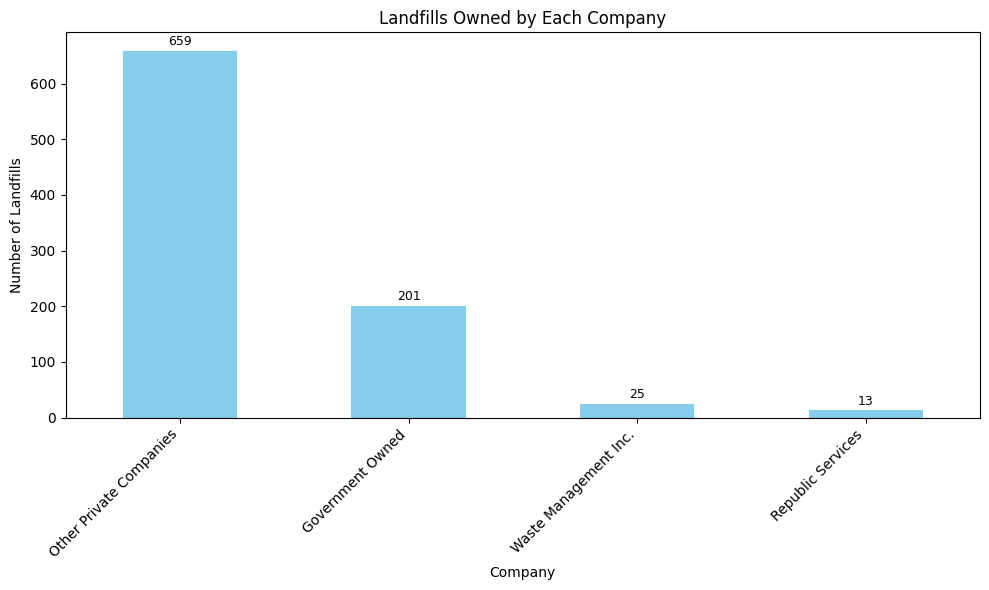

In [44]:
# Count the number of landfills per company
landfill_counts = construction_landfills_df["Company"].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = landfill_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel("Company")
plt.ylabel("Number of Landfills")
plt.title("Landfills Owned by Each Company")
plt.xticks(rotation=45, ha='right')

# Add data labels
for i, value in enumerate(landfill_counts):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=9)

# Display the plot
plt.tight_layout()
plt.show()


In [48]:
# Define color mapping based on company
color_mapping = {
    "Waste Management Inc.": "red",
    "Republic Services": "blue",
    "Government Owned": "grey",
    "Other Private Companies": "green"
}

# Initialize map centered on US
landfill_map = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

# Plot each landfill
for _, row in construction_landfills_df.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    name = row["Name"]
    company = row["Company"]

    # Assign color based on company
    color = color_mapping.get(company, "gray")  # fallback to gray

    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(f"{name}<br><b>Owner:</b> {company}", max_width=300)
    ).add_to(landfill_map)


from IPython.display import display
display(landfill_map)
